In [31]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2607 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1049 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0707 - accuracy: 0.9775


In [27]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0924 - accuracy: 0.9705
0.09240489453077316 0.9704999923706055


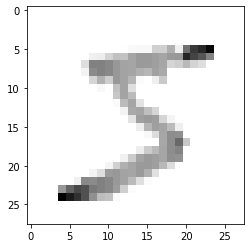

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [28]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [29]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [38]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [42]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  100480    
_________________________________________________________________
dense_7 (Dense)              multiple                  16512     
_________________________________________________________________
dense_8 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [46]:
predictions = new_model.predict(x_test)

In [47]:
print(predictions)

[[1.1901778e-09 9.1132737e-09 1.9825557e-06 ... 9.9999690e-01
  1.0787863e-08 5.2690893e-07]
 [3.2267412e-06 2.7424073e-02 9.7184092e-01 ... 8.7641929e-08
  3.6724136e-06 5.9841433e-08]
 [4.3415504e-08 9.9993193e-01 6.8854587e-07 ... 3.4365316e-05
  2.6691752e-05 1.8991556e-06]
 ...
 [1.6045008e-10 4.4013456e-07 7.4038624e-08 ... 1.3593926e-05
  4.0018148e-07 7.1926479e-05]
 [1.4755846e-06 3.6262077e-07 2.0051505e-07 ... 1.2178416e-05
  5.2368753e-03 1.7568882e-06]
 [1.3701630e-06 3.0606262e-08 3.3303291e-08 ... 7.7767154e-11
  1.2618578e-07 4.3413404e-08]]


In [53]:
import numpy as np

print(np.argmax(predictions[32]))

3


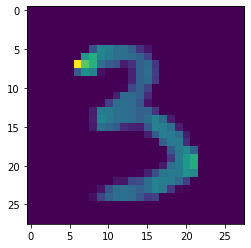

In [54]:
plt.imshow(x_test[32])
plt.show()